In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization, Dropout, Flatten
import os

2024-01-26 18:42:02.774480: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 18:42:02.774542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 18:42:02.806128: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 18:42:02.870698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-26 18:42:03.650989: W tensorflow/compiler/tf2

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
conv_base = keras.applications.ResNet152V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
conv_base.trainable=False

2024-01-26 18:42:04.663543: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 18:42:04.768709: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-26 18:42:04.768938: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
'''import zipfile
zip = zipfile.ZipFile('dog_breed_class/dog-breed-identification.zip')
zip.extractall('dog_breed_class')
zip.close()'''

"import zipfile\nzip = zipfile.ZipFile('dog_breed_class/dog-breed-identification.zip')\nzip.extractall('dog_breed_class')\nzip.close()"

In [4]:
import pandas as pd
df = pd.read_csv('dog_class_breed/labels.csv')

In [5]:
df.head()
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [6]:
folder_path = 'dog_class_breed/test/'
img_path = []
for file in os.listdir(folder_path):
  img_path.append(str(file))

In [7]:
df_test = pd.DataFrame({'img_path':img_path})
df_test

,img_path
0,a5c1646de93471cbad69c80119572687.jpg
1,3d1a15fec91e3648daaf273373a1c03d.jpg
2,c627d3fbbcd73ee2a1fa1d2058b0643e.jpg
3,d4f769129f9c415999dc400545af6053.jpg
4,f82a903b13fb1d4331d889847d93259f.jpg
...,...
10352,1dc4659db1597e641743c8f0823cc43d.jpg
10353,52de55bf937d6790ae8efab675b7adef.jpg
10354,0042d6bf3e5f3700865886db32689436.jpg
10355,37f99379060ae74e3bcc26762753a826.jpg


In [8]:
df.iloc[:, 1].notnull

<bound method Series.notnull of 0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object>

In [9]:
train_dir = 'dog_class_breed/train/'
test_dir = 'dog_class_breed/test/'
df['filename'] = (df['id'].astype(str) + '.jpg')
df
type(df['filename'])


pandas.core.series.Series

In [10]:
num_of_classes = len(pd.unique(df['breed']))
num_of_classes
breed_counts = df['breed'].value_counts()
print(breed_counts)

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()  
integer_encoded = label_encoder.fit_transform(df['breed'])
one_hot_encoded_labels = to_categorical(integer_encoded)
df['encoded_labels'] = list(one_hot_encoded_labels)
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.head()


,id,breed,filename,encoded_labels
6887,ad019e394b55406f412b9a03899d5705,welsh_springer_spaniel,ad019e394b55406f412b9a03899d5705.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7975,c77266278126119fe02a3550dd0c3c1c,norfolk_terrier,c77266278126119fe02a3550dd0c3c1c.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher,ffe5f6d8e2bff356e9482a80a6e29aac.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4695,75dbdbf6814e6c72a7cab75c73a5acd7,leonberg,75dbdbf6814e6c72a7cab75c73a5acd7.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
940,16fdb4a145a7f5695a264ba980e23bc3,norwich_terrier,16fdb4a145a7f5695a264ba980e23bc3.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [20]:
datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=(1./255))

train_dataset = datagen.flow_from_dataframe(
    dataframe = train_df,
    directory='dog_class_breed/train/',
    x_col='filename',
    y_col='breed',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

validation_dataset = test_datagen.flow_from_dataframe(
    dataframe = validate_df,
    directory='dog_class_breed/train/',
    x_col='filename',
    y_col='breed',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42,
    shuffle=False
)

test_dataset = test_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory='dog_class_breed/test/',
    x_col='img_path',
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    seed=42,
    shuffle=False
)

print(len(train_df))


Found 8177 validated image filenames belonging to 120 classes.
Found 2045 validated image filenames belonging to 120 classes.
Found 10357 validated image filenames.
8177


In [13]:
import kerastuner as kt
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
#####number of layers + number of nodes
def build_model(hp):
  model = Sequential()
  model.add(conv_base)
  model.add(Flatten())
  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
      '''model.add(Conv2D(
          filters=hp.Int('conv_'+str(i)+'_filter', min_value=32, max_value=128, step=16),
          kernel_size=hp.Choice('conv_'+str(i)+'_kernel', values=[3,5]),
          activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']),
          input_shape=(128, 128, 3)))
      model.add(MaxPooling2D(
          pool_size=(2,2),
          padding='valid',
          stride=2
      ))'''
      model.add(Dense(
          hp.Int('units'+str(i), min_value=8, max_value=256, step=8),
          activation=hp.Choice('activation'+ str(i), values=['relu', 'tanh', 'sigmoid']),
          kernel_regularizer=l2(hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-4))
          )
      )
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
  model.add(Dense(120, activation="softmax"))

  hp_optimizer=hp.Choice('optimizer', values=['rmsprop', 'sgd', 'nadam', 'adadelta', 'adam'])  
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  if hp_optimizer == 'adam':
      hp_optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)
  elif hp_optimizer == 'sgd':
      hp_optimizer = keras.optimizers.SGD(learning_rate=hp_learning_rate)
  elif hp_optimizer == 'rmsprop':
      hp_optimizer = keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
  elif hp_optimizer == 'nadam':
      hp_optimizer = keras.optimizers.Nadam(learning_rate=hp_learning_rate)
  elif hp_optimizer == 'adadelta':
      hp_optimizer = keras.optimizers.Adadelta(learning_rate=hp_learning_rate)
    
  
  model.compile(optimizer=hp_optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


/tmp/ipykernel_5464/4002721001.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [14]:
tuner = kt.RandomSearch(build_model,
                        objective='val_loss', 
                        max_trials=15,
                        directory='dog_class_breed/hyper_tuner_test/',
                        project_name='hyptertuner_test_dog_class_breed')

Reloading Tuner from dog_class_breed/hyper_tuner_test/hyptertuner_test_dog_class_breed/tuner0.json


In [15]:
tuner.search(train_dataset, epochs=10, validation_data=validation_dataset)

In [16]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 120,
 'activation0': 'sigmoid',
 'l2': 0.0009345367259915188,
 'dropout0': 0.1,
 'optimizer': 'sgd',
 'learning_rate': 0.01,
 'units1': 120,
 'activation1': 'relu',
 'dropout1': 0.4,
 'units2': 232,
 'activation2': 'sigmoid',
 'dropout2': 0.3,
 'units3': 144,
 'activation3': 'sigmoid',
 'dropout3': 0.8,
 'units4': 8,
 'activation4': 'relu',
 'dropout4': 0.8,
 'units5': 216,
 'activation5': 'sigmoid',
 'dropout5': 0.4,
 'units6': 208,
 'activation6': 'relu',
 'dropout6': 0.3,
 'units7': 104,
 'activation7': 'relu',
 'dropout7': 0.1,
 'units8': 208,
 'activation8': 'relu',
 'dropout8': 0.9,
 'units9': 16,
 'activation9': 'tanh',
 'dropout9': 0.3}

In [18]:
model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_optimizer = best_hyperparameters.get('optimizer')
print(best_optimizer)
best_lr = best_hyperparameters.get('learning_rate')
print(best_lr)
model.summary()
'''model.save('dog_breed_classifier.h5')'''

sgd
0.01
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 120)               12042360  
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 120)       

"model.save('dog_breed_classifier.h5')"

In [28]:
import scipy
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "dog_breed_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

early_stopping = EarlyStopping(patience=50,
                               monitor='val_accuracy',
                               verbose=1,
                               mode='min',
                               restore_best_weights=True,
                               min_delta = 0.001
                               )

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=1000, validation_data=validation_dataset, steps_per_epoch=len(df[:8000]) // 32, callbacks=[checkpoint, early_stopping])

In [29]:
model.load_weights('dog_breed_model.h5')
history = model.fit(train_dataset, epochs=1000, validation_data=validation_dataset, steps_per_epoch=len(train_df) // 32, callbacks=[checkpoint, early_stopping], initial_epoch=104)

Epoch 105/1000
255/255 [==============================] - ETA: 0s - loss: 1.4123 - accuracy: 0.7190
Epoch 105: val_accuracy improved from -inf to 0.74670, saving model to dog_breed_model.h5
255/255 [==============================] - 63s 247ms/step - loss: 1.4123 - accuracy: 0.7190 - val_loss: 1.2780 - val_accuracy: 0.7467
Epoch 106/1000
255/255 [==============================] - ETA: 0s - loss: 1.4319 - accuracy: 0.7143
Epoch 106: val_accuracy improved from 0.74670 to 0.75159, saving model to dog_breed_model.h5
255/255 [==============================] - 63s 248ms/step - loss: 1.4319 - accuracy: 0.7143 - val_loss: 1.2815 - val_accuracy: 0.7516
Epoch 107/1000
255/255 [==============================] - ETA: 0s - loss: 1.4265 - accuracy: 0.7142
Epoch 107: val_accuracy did not improve from 0.75159
255/255 [==============================] - 65s 253ms/step - loss: 1.4265 - accuracy: 0.7142 - val_loss: 1.2810 - val_accuracy: 0.7516
Epoch 108/1000
255/255 [==============================] - ETA:

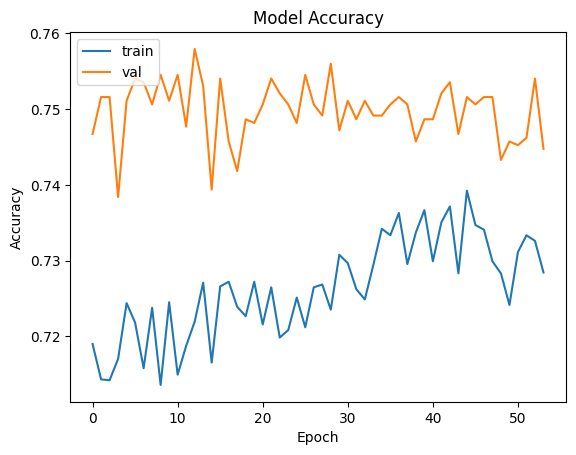

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

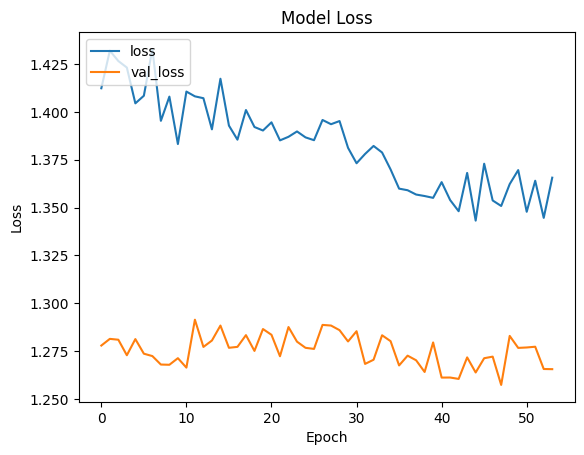

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [33]:
model.save('trained_dog_breed_classifier.h5')

/home/rutpatel/Documents/deeplearning/dl/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
predictions = model.predict(test_dataset, batch_size=32)

10357/10357 [==============================] - 155s 15ms/step


In [38]:
print(predictions)

[[7.43483775e-04 1.73178338e-03 1.96193170e-04 ... 8.87162332e-06
  4.77510184e-05 2.05406308e-04]
 [1.20850105e-04 3.85218700e-05 3.75018999e-07 ... 3.62030660e-05
  2.13920910e-04 4.22979866e-07]
 [1.12551637e-03 2.61750156e-05 6.03906556e-05 ... 2.72691777e-05
  6.03920962e-05 2.13940279e-04]
 ...
 [2.76992159e-06 3.64705420e-06 2.02504975e-06 ... 8.81483993e-06
  6.71708491e-03 8.35994979e-06]
 [4.22111480e-03 2.29487419e-01 1.79315265e-02 ... 2.94859544e-03
  5.62217901e-05 1.97992171e-03]
 [4.70484883e-06 2.14224474e-06 2.65954304e-06 ... 1.25504448e-06
  4.77914218e-05 1.82448202e-05]]


In [39]:
dog_breeds = sorted(list(set(df['breed'])))
preds_df = pd.DataFrame(columns=["id"] + dog_breeds)
preds_df.head()
test_path = "dog_class_breed/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head
preds_df.loc[:,dog_breeds]= predictions
preds_df.to_csv('submission_1.csv',index=None)
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,a5c1646de93471cbad69c80119572687,0.000743,0.001732,0.000196,0.000028,0.000003,0.000042,0.00007,0.000001,0.000003,...,0.001045,0.000004,0.0,0.0,0.000001,0.000007,0.000163,0.000009,0.000048,0.000205
1,3d1a15fec91e3648daaf273373a1c03d,0.000121,0.000039,0.0,0.000017,0.000003,0.000001,0.0,0.000004,0.0,...,0.000058,0.000024,0.000001,0.000003,0.0,0.0,0.000001,0.000036,0.000214,0.0
2,c627d3fbbcd73ee2a1fa1d2058b0643e,0.001126,0.000026,0.00006,0.000009,0.000113,0.000046,0.000097,0.010553,0.001647,...,0.004553,0.000565,0.000212,0.000025,0.000029,0.000044,0.001184,0.000027,0.00006,0.000214
3,d4f769129f9c415999dc400545af6053,0.000007,0.000222,0.00003,0.000128,0.000332,0.000087,0.000002,0.000213,0.000008,...,0.000165,0.000279,0.000069,0.000137,0.000295,0.000052,0.000086,0.001422,0.000833,0.000001
4,f82a903b13fb1d4331d889847d93259f,0.006111,0.001034,0.000032,0.000023,0.000005,0.000045,0.001405,0.000002,0.000017,...,0.000002,0.000006,0.000001,0.000009,0.000005,0.000002,0.000044,0.000034,0.000017,0.00234


In [42]:
max_columns = preds_df.iloc[:, 1:].idxmax(axis=1)
max_values = preds_df.iloc[:, 1:].max(axis=1)
predicted_labels = pd.DataFrame({'id':preds_df['id'], 'Max_Column': max_columns, 'Max_Value': max_values})
print(predicted_labels)

                                     id                   Max_Column Max_Value
0      a5c1646de93471cbad69c80119572687  soft-coated_wheaten_terrier  0.369935
1      3d1a15fec91e3648daaf273373a1c03d           kerry_blue_terrier  0.972149
2      c627d3fbbcd73ee2a1fa1d2058b0643e                     pekinese  0.604979
3      d4f769129f9c415999dc400545af6053                       kuvasz  0.819197
4      f82a903b13fb1d4331d889847d93259f                       briard  0.855759
...                                 ...                          ...       ...
10352  1dc4659db1597e641743c8f0823cc43d                      samoyed  0.995038
10353  52de55bf937d6790ae8efab675b7adef                       beagle  0.745175
10354  0042d6bf3e5f3700865886db32689436             sealyham_terrier  0.981517
10355  37f99379060ae74e3bcc26762753a826                     malinois  0.239415
10356  b79c1c150c4a896fe2170ce8f6a76a10                border_collie  0.601987

[10357 rows x 3 columns]
